This is my preliminary data analysis of the Framingham Heart Study Open Database.
In this analysis I will try and use the data source to showcase some of the original findings of the Framingham Heart Study. 
I will also show some of the other trends and find some of the principle components influencing the data.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
pd.set_option('display.max_columns', None)
df = pd.read_csv('frmgham2.csv')
df.head()

,RANDID,SEX,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIABETES,BPMEDS,HEARTRTE,GLUCOSE,educ,PREVCHD,PREVAP,PREVMI,PREVSTRK,PREVHYP,TIME,PERIOD,HDLC,LDLC,DEATH,ANGINA,HOSPMI,MI_FCHD,ANYCHD,STROKE,CVD,HYPERTEN,TIMEAP,TIMEMI,TIMEMIFC,TIMECHD,TIMESTRK,TIMECVD,TIMEDTH,TIMEHYP
0,2448,1,195.0,39,106.0,70.0,0,0.0,26.97,0,0.0,80.0,77.0,4.0,0,0,0,0,0,0,1,NaN,NaN,0,0,1,1,1,0,1,0,8766,6438,6438,6438,8766,6438,8766,8766
1,2448,1,209.0,52,121.0,66.0,0,0.0,NaN,0,0.0,69.0,92.0,4.0,0,0,0,0,0,4628,3,31.0,178.0,0,0,1,1,1,0,1,0,8766,6438,6438,6438,8766,6438,8766,8766
2,6238,2,250.0,46,121.0,81.0,0,0.0,28.73,0,0.0,95.0,76.0,2.0,0,0,0,0,0,0,1,NaN,NaN,0,0,0,0,0,0,0,0,8766,8766,8766,8766,8766,8766,8766,8766
3,6238,2,260.0,52,105.0,69.5,0,0.0,29.43,0,0.0,80.0,86.0,2.0,0,0,0,0,0,2156,2,NaN,NaN,0,0,0,0,0,0,0,0,8766,8766,8766,8766,8766,8766,8766,8766
4,6238,2,237.0,58,108.0,66.0,0,0.0,28.50,0,0.0,80.0,71.0,2.0,0,0,0,0,0,4344,3,54.0,141.0,0,0,0,0,0,0,0,0,8766,8766,8766,8766,8766,8766,8766,8766


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11627 entries, 0 to 11626
Data columns (total 39 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RANDID    11627 non-null  int64  
 1   SEX       11627 non-null  int64  
 2   TOTCHOL   11218 non-null  float64
 3   AGE       11627 non-null  int64  
 4   SYSBP     11627 non-null  float64
 5   DIABP     11627 non-null  float64
 6   CURSMOKE  11627 non-null  int64  
 7   CIGPDAY   11548 non-null  float64
 8   BMI       11575 non-null  float64
 9   DIABETES  11627 non-null  int64  
 10  BPMEDS    11034 non-null  float64
 11  HEARTRTE  11621 non-null  float64
 12  GLUCOSE   10187 non-null  float64
 13  educ      11332 non-null  float64
 14  PREVCHD   11627 non-null  int64  
 15  PREVAP    11627 non-null  int64  
 16  PREVMI    11627 non-null  int64  
 17  PREVSTRK  11627 non-null  int64  
 18  PREVHYP   11627 non-null  int64  
 19  TIME      11627 non-null  int64  
 20  PERIOD    11627 non-null  in

In [3]:
len(df)

11627

We can see here that there are 11627 entries into this table.

In [4]:
#How many individuals there are in this study
len(df.RANDID.value_counts())

4434

I am interested to see the distribution of participant age during the study and to see what is occuring between their visits

In [28]:
visits_df = df.groupby(by='RANDID').count()
fig_1 = sns.countplot(x= visits_df['SEX'], data=visits_df, )
fig_1.set(xlabel ="VISITS", title="Number of Visits of Study Participants")

ValueError: could not broadcast input array from shape (4434,1) into shape (4434,)

<AxesSubplot:xlabel='AGE', ylabel='Count'>

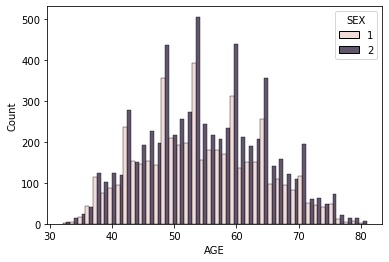

In [6]:
# I am interested in the age of the participants and the distribution of the ages.
sns.histplot(x= df['AGE'], hue=df['SEX'], multiple="dodge")

<AxesSubplot:xlabel='SEX', ylabel='count'>

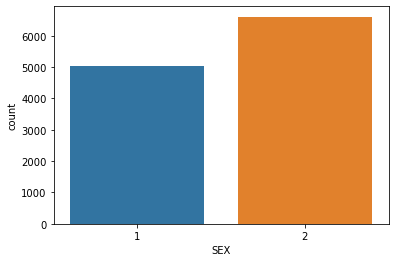

In [22]:
# It is important to see the number of Men and Women in the trial and their realtive proportions.
sns.countplot(data=df, x = 'SEX')

<AxesSubplot:xlabel='PERIOD', ylabel='AGE'>

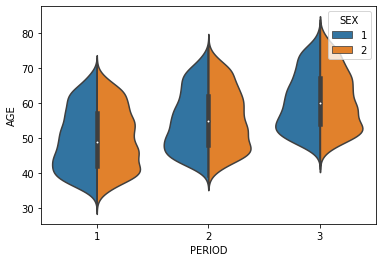

In [27]:
sns.violinplot(data=df, x = 'PERIOD', y = "AGE", hue = "SEX", split = True)

The Framingham Heart Study data set has been used to infer a number of risk factors for Cardiovascular Disease.

1. Smoking was found to increase the risk of CHD (1960)
2. Cholesterol and high BP increased the risk of CHD (1961)
3. Physical activity decreased the risk of CHD (1967)
4. High levels of HDL cholesterol was found to increase the risk of CHD (1988)
5. The lifetime risk of developing CHD was higher in men than in women (1999)
6. Obesity is a risk factor for heart failure (2002)

<AxesSubplot:xlabel='CIGPDAY', ylabel='Count'>

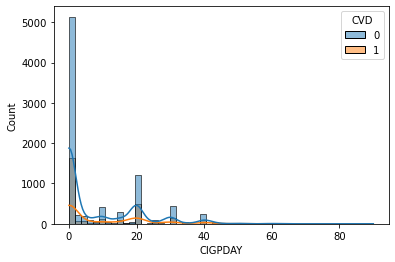

In [9]:
sns.histplot(data=df, x = 'CIGPDAY', hue='CVD', kde=True)
# We can see here the distribution of how much people smoke and can see superimposed on that the distribution of people who have CVD

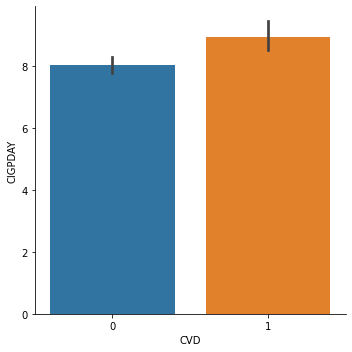

In [10]:
# 1. Cigarette use vs CVD
sns.catplot(x='CVD', y='CIGPDAY', kind= 'bar' ,data=df)

#Here we can see that there is a correlation between increased rates of CVD and increased smoking rates. 

In [31]:
df.groupby(by='CVD').CIGPDAY.mean()

CVD
0    8.025135
1    8.929739
Name: CIGPDAY, dtype: float64

<AxesSubplot:xlabel='TOTCHOL', ylabel='Count'>

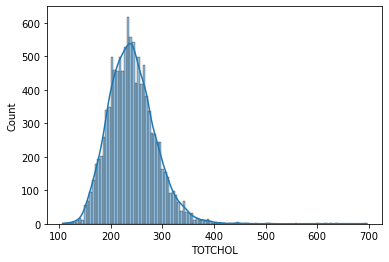

In [11]:
sns.histplot(data=df, x = 'TOTCHOL', kde=True)
# We can see here the distribution of people's total cholesterol

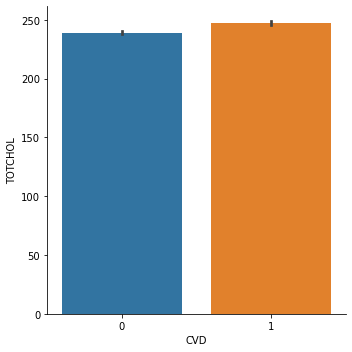

In [12]:
# 2. Cholesterol vs CVD
sns.catplot(x='CVD', y = 'TOTCHOL', kind = 'bar', data = df)

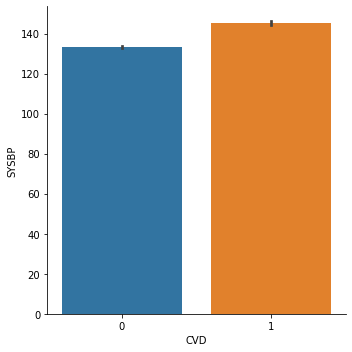

In [13]:
# 2. High BP vs CVD
sns.catplot(x='CVD', y = 'SYSBP', kind = 'bar', data = df)

<AxesSubplot:>

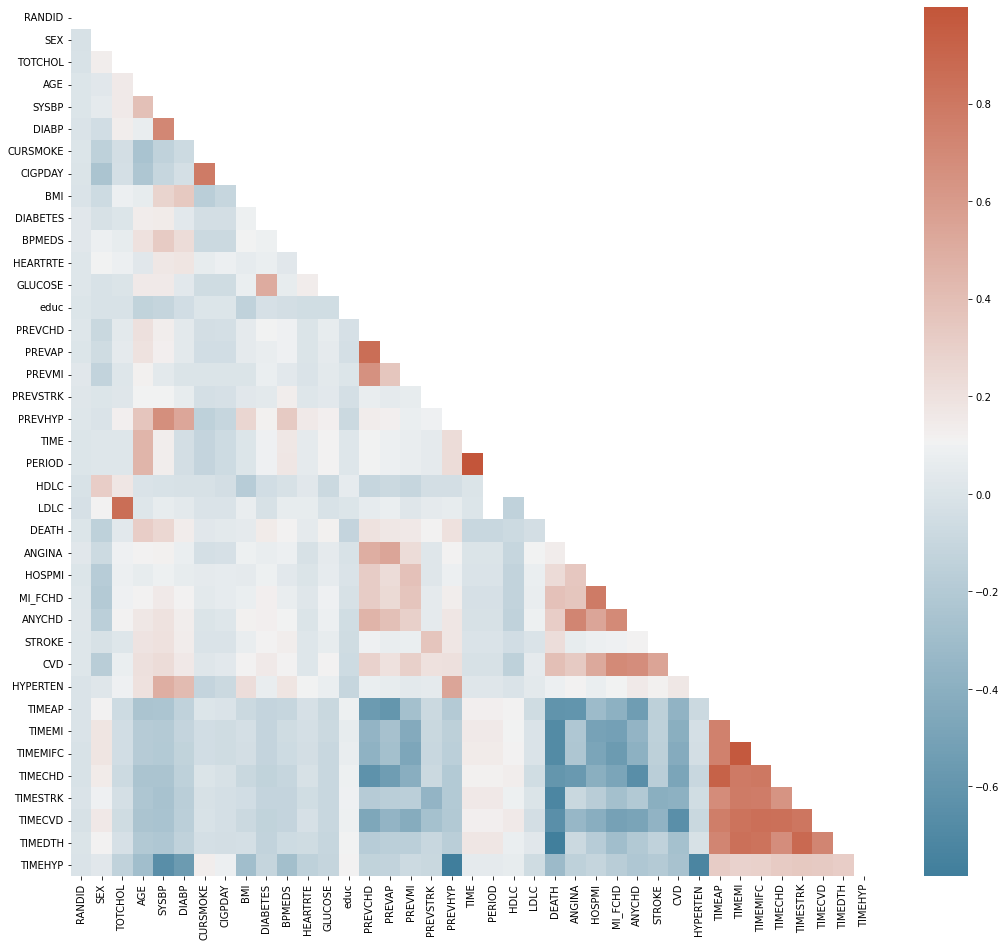

In [14]:
# I am interested to see if there are any other correlations between the features of this dataset
corr = df.corr()

f, ax = plt.subplots(figsize=(18, 16))

mask = np.triu(np.ones_like(corr, dtype=bool))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask = mask, cmap=cmap)


Lets investigate some of these correlations that we can infer from this heatmap. 

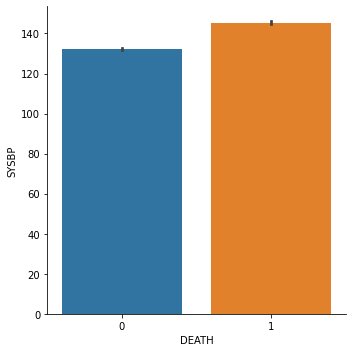

In [15]:
sns.catplot(data=df, x = "DEATH", y = "SYSBP", kind = "bar")

Here we can see another correlation between an increased SYSBP and increased rate of death. 

<AxesSubplot:xlabel='BMI', ylabel='SYSBP'>

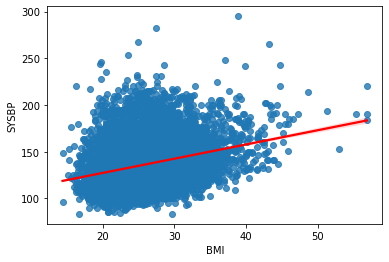

In [16]:
sns.regplot(data=df, x = "BMI", y = "SYSBP", line_kws={"color": "red"})

We can see that there is an increased rate of hypertension in those people with an increased BMI
Lets investigate other trends that are associated with hypertension

Looking at the correlation figure, there are a couple of trends that spring out:
1. Hypertension and Smoking appear to be related 
2. Hypertension and sex appear to be correlated 
3. Hypertension and education appear to be related

<AxesSubplot:xlabel='CURSMOKE', ylabel='SYSBP'>

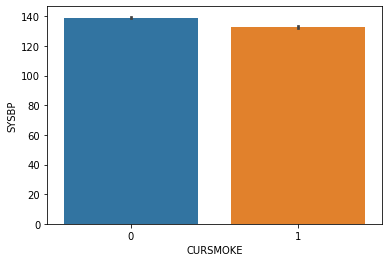

In [17]:
sns.barplot(data=df, x = "CURSMOKE", y = "SYSBP")

Interesting, not what I would expect from current understanding, Smoking appears here to have a negative correlation with Systolic BP

<AxesSubplot:xlabel='SEX', ylabel='SYSBP'>

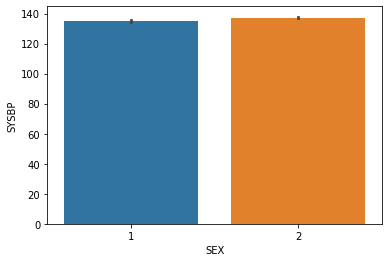

In [18]:
sns.barplot(data=df, x = "SEX", y = "SYSBP")

Hmmm. there seems to be a slightly increased average SYSBP in Men than Women

<AxesSubplot:xlabel='educ', ylabel='SYSBP'>

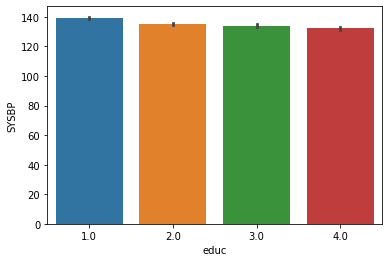

In [19]:
sns.barplot(data=df, x = "educ", y = "SYSBP")

Increased education appears to be correlated with a decreased average BP

In [30]:
df.groupby(by='educ').SYSBP.mean()

educ
1.0    139.415991
2.0    134.882991
3.0    134.052785
4.0    132.130290
Name: SYSBP, dtype: float64

In this preliminary data analysis, we have looked into some of the trends that appear in the data and some of the correlations that can be shown between the features.

In the second part of this project I am going to build a random forest model on the data set and try and predict an individual's 10 year risk of death. I will then look more closely into the features of the random forest and try and interrogate the coefficients via data analysis.

My cleaning of the data will involve both normalising and standardising the data. I will also be looking at the distribution of the data and removing any outliers.